<a href="https://colab.research.google.com/github/kuzmichye/aeroton_hack/blob/main/hack_aero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np  # Импорт библиотеки NumPy для работы с линейной алгеброй и массивами
import pandas as pd  # Импорт библиотеки Pandas для обработки данных и работы с CSV файлами (например, pd.read_csv)
import matplotlib.pyplot as plt  # Импорт библиотеки Matplotlib для визуализации данных
import imageio.v2 as imageio  # Импорт библиотеки imageio для чтения и записи изображений
import tensorflow as tf  # Импорт библиотеки TensorFlow для работы с машинным обучением и нейронными сетями
import os  # Импорт библиотеки os для работы с файловой системой
%pip install opendatasets
import opendatasets as od  # Импорт библиотеки opendatasets для загрузки наборов данных из Open Datasets
from tensorflow.keras.layers import Input  # Импорт слоя Input для создания входного слоя модели
from tensorflow.keras.layers import Conv2D  # Импорт слоя свертки 2D для построения сверточных нейронных сетей
from tensorflow.keras.layers import MaxPooling2D  # Импорт слоя максимального объединения 2D
from tensorflow.keras.layers import Dropout  # Импорт слоя Dropout для борьбы с переобучением
from tensorflow.keras.layers import Conv2DTranspose  # Импорт слоя транспонированной свертки 2D для декодирования
from tensorflow.keras.layers import concatenate  # Импорт функции concatenate для объединения слоев





In [4]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ede7ec79-b78f-996a-e188-eb76a4c40858)


In [5]:
od.download("https://www.kaggle.com/datasets/bulentsiyah/semantic-drone-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yegorkuzmenko
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/bulentsiyah/semantic-drone-dataset


100%|██████████| 3.89G/3.89G [03:31<00:00, 19.7MB/s]


In [6]:
file_path = 'semantic-drone-dataset/class_dict_seg.csv'

# Чтение CSV файла
labels = pd.read_csv(file_path)

# Вывод первых 5 строк
print(labels.head())

         name    r    g    b
0   unlabeled    0    0    0
1  paved-area  128   64  128
2        dirt  130   76    0
3       grass    0  102    0
4      gravel  112  103   87


In [7]:
labels.name

0       unlabeled
1      paved-area
2            dirt
3           grass
4          gravel
5           water
6           rocks
7            pool
8      vegetation
9            roof
10           wall
11         window
12           door
13          fence
14     fence-pole
15         person
16            dog
17            car
18        bicycle
19           tree
20      bald-tree
21      ar-marker
22       obstacle
23    conflicting
Name: name, dtype: object

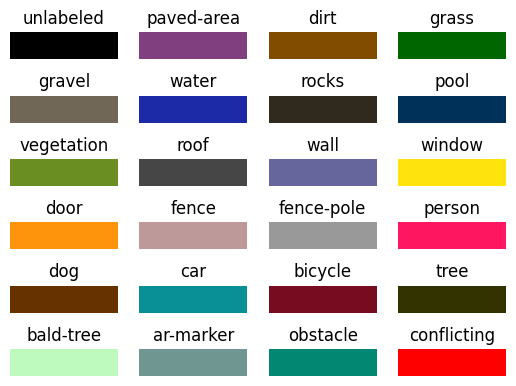

In [8]:
# Печать меток и их цветов для справки
for index, label in enumerate(labels.name):
    plt.subplot(6, 4, index + 1)  # Создание подграфиков в сетке 6x4
    (r, g, b) = labels.iloc[index].values[1:]  # Извлечение значений R, G, B для текущей метки
    img_ = np.array([[[r, g, b], [r, g, b], [r, g, b], [r, g, b]]])  # Создание изображения цвета
    plt.title(label)  # Установка заголовка с названием метки
    plt.imshow(img_)  # Отображение изображения цвета
    plt.axis('off')  # Скрытие осей

plt.show()  # Отображение всех графиков

In [9]:


# Задание директорий для входных изображений и масок
input_directory = 'semantic-drone-dataset/dataset/semantic_drone_dataset/original_images'  # Путь к изображениям
mask_directory = 'semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks'  # Путь к маскам

# Получение списка файлов в указанных директориях
input_files = os.listdir(input_directory)  # Список входных изображений
mask_files = os.listdir(mask_directory)  # Список масок

# Сортировка списков файлов
input_files.sort()  # Сортировка файлов изображений
mask_files.sort()  # Сортировка файлов масок

# Формирование полного пути к изображениям
input_image_paths = [os.path.join(input_directory, filename) for filename in input_files]

# Формирование полного пути к маскам
mask_image_paths = [os.path.join(mask_directory, filename) for filename in mask_files]

print(mask_image_paths)

# Здесь можно добавить дальнейшую обработку input_image_paths и mask_image_paths


['semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/000.png', 'semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/001.png', 'semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/002.png', 'semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/003.png', 'semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/004.png', 'semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/005.png', 'semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/006.png', 'semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/008.png', 'semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/011.png', 'semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/013.png', 'semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/014.png', 'semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/015.png', 'semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_m

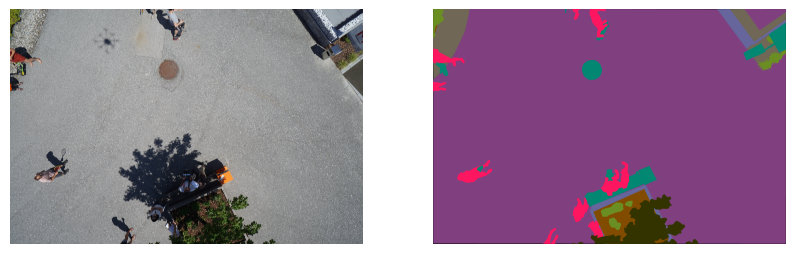

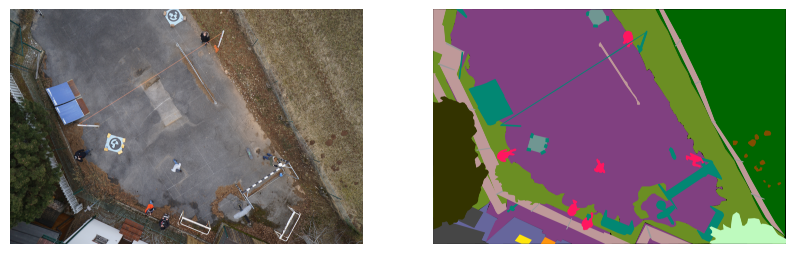

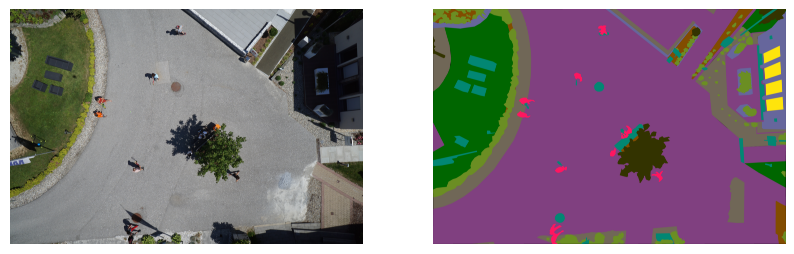

In [10]:

# Количество изображений и масок для отображения
num_images = 3

# Цикл для отображения изображений и их масок
for i in range(num_images):
    img1 = imageio.imread(input_image_paths[i])  # Чтение изображения по пути
    mask1 = imageio.imread(mask_image_paths[i])  # Чтение маски по пути

    # Создание подграфиков для отображения изображения и маски
    _, arr = plt.subplots(1, 2, figsize=(10, 10))  # 1 строка, 2 столбца
    arr[0].imshow(img1)  # Отображение изображения
    arr[0].axis('off')  # Скрытие осей для изображения
    arr[1].imshow(mask1)  # Отображение маски
    arr[1].axis('off')  # Скрытие осей для маски

plt.show()  # Отображение всех графиков


b'semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/000.jpg'
b'semantic-drone-dataset/RGB_color_image_masks/RGB_color_image_masks/000.png'


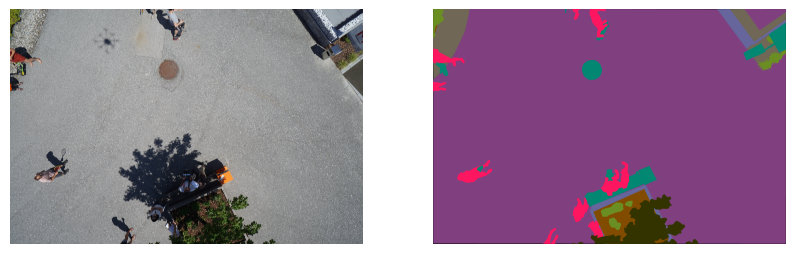

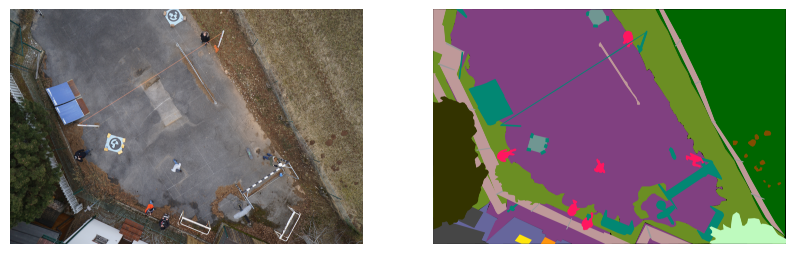

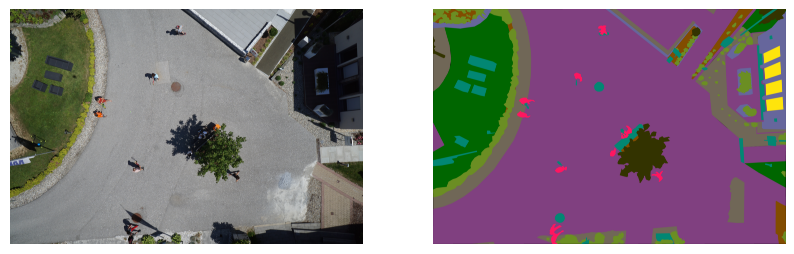

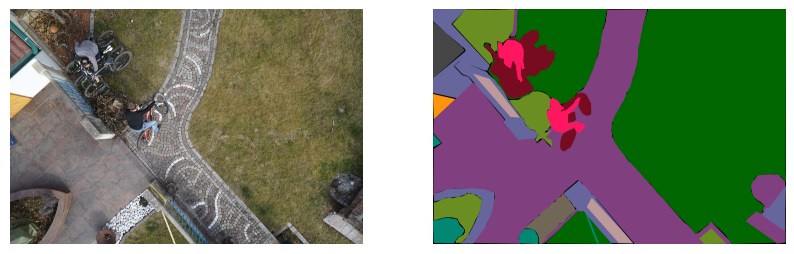

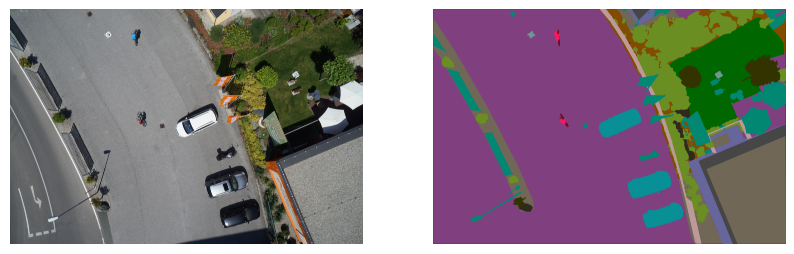

In [11]:

# Создание тензоров из списков путей к изображениям и маскам
image_names_tensor = tf.constant(input_image_paths)
mask_names_tensor = tf.constant(mask_image_paths)

# Формирование набора данных из путей
dataset = tf.data.Dataset.from_tensor_slices((image_names_tensor, mask_names_tensor))

# Печать путей к одному изображению и маске
for image_path, mask_path in dataset.take(1):
    print(image_path.numpy())  # Вывод пути к изображению
    print(mask_path.numpy())  # Вывод пути к маске

# Отображение первых пар изображений и масок с использованием TensorFlow Dataset
for image_path, mask_path in dataset.take(5):
    img = imageio.imread(image_path.numpy().decode('utf-8'))  # Чтение изображения
    mask = imageio.imread(mask_path.numpy().decode('utf-8'))  # Чтение маски

    # Создание подграфиков
    fig, axes = plt.subplots(1, 2, figsize=(10, 10))
    axes[0].imshow(img)  # Отображение изображения
    axes[0].axis('off')  # Скрытие осей
    axes[1].imshow(mask)  # Отображение маски
    axes[1].axis('off')  # Скрытие осей

plt.show()  # Отображение графиков


In [12]:
def load_and_process_image_mask(image_path, mask_path):
    # Чтение и обработка изображения
    image_content = tf.io.read_file(image_path)  # Чтение файла изображения
    image = tf.image.decode_png(image_content, channels=3)  # Декодирование изображения
    image = tf.image.convert_image_dtype(image, tf.float32)  # Преобразование в тип float32

    # Чтение и обработка маски
    mask_content = tf.io.read_file(mask_path)  # Чтение файла маски
    mask = tf.image.decode_png(mask_content, channels=3)  # Декодирование маски
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)  # Преобразование маски, выбирая максимальное значение по каналам

    return image, mask  # Возврат обработки изображения и маски


In [13]:
def resize_image_mask(image, mask):
    # Изменение размера изображения и маски
    resized_image = tf.image.resize(image, (96, 128), method='nearest')  # Изменение размера изображения
    resized_mask = tf.image.resize(mask, (96, 128), method='nearest')  # Изменение размера маски

    return resized_image, resized_mask  # Возвращение изменённых изображений и масок


image_ds = dataset.map(load_and_process_image_mask)
processed_images_ds = image_ds.map(resize_image_mask)
print(processed_images_ds)

<_MapDataset element_spec=(TensorSpec(shape=(96, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(96, 128, 1), dtype=tf.uint8, name=None))>


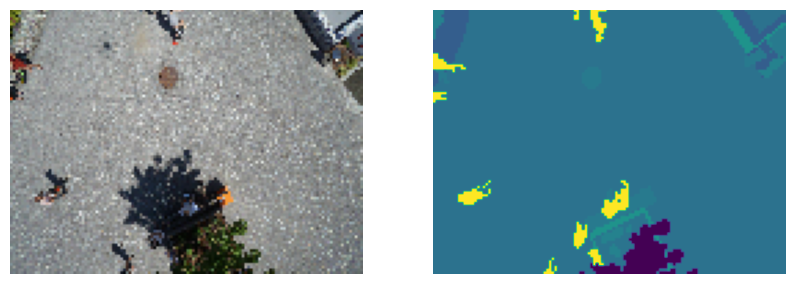

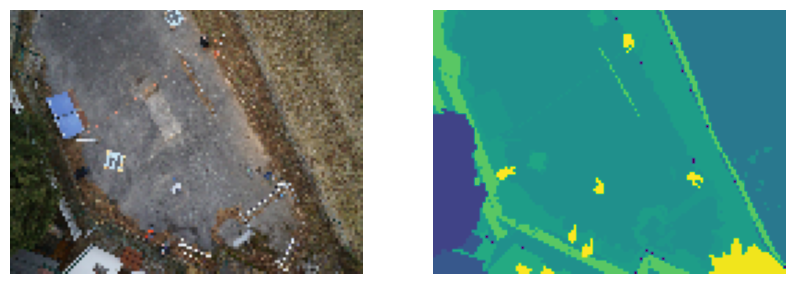

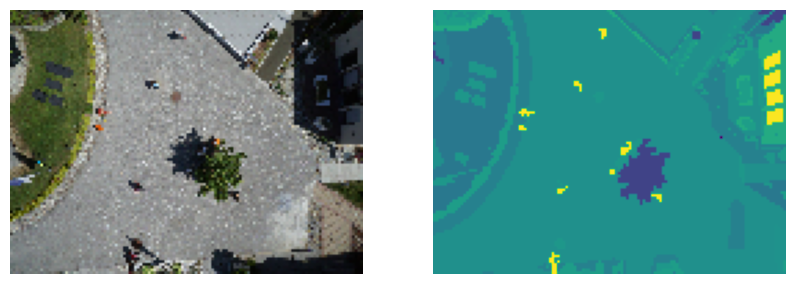

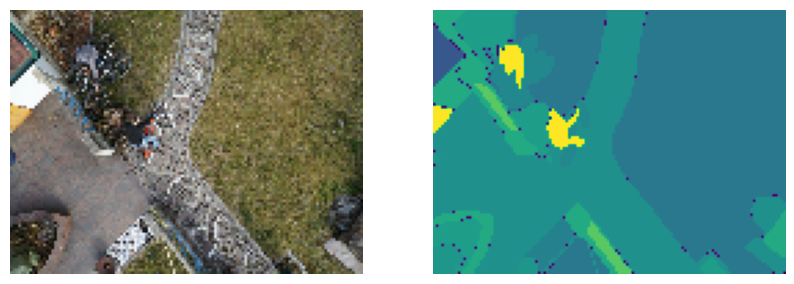

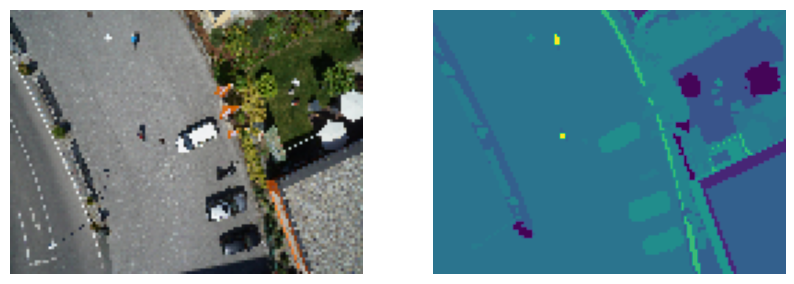

In [14]:
for image, mask in processed_images_ds.take(5):  # Берём первые 5 элементов из набора данных
    # Извлечение изображений и масок
    image_np = image.numpy()  # Преобразование тензора изображения в numpy массив
    mask_np = mask.numpy()  # Преобразование тензора маски в numpy массив

    # Создание подграфиков для отображения
    fig, arr = plt.subplots(1, 2, figsize=(10, 10))  # 1 строка, 2 столбца
    arr[0].imshow(tf.keras.preprocessing.image.array_to_img(image_np))  # Отображение изображения
    arr[0].axis('off')  # Скрытие осей для изображения
    arr[1].imshow(tf.keras.preprocessing.image.array_to_img(mask_np))  # Отображение маски
    arr[1].axis('off')  # Скрытие осей для маски

plt.show()

**Объяснение решения**

Архитектура U-Net: Эта архитектура была выбрана для задач сегментации изображений, поскольку она оптимально соединяет сократительные и расширяющие блоки, что позволяет эффективно помнить и использовать детальную информацию из входных данных.

Функции Conv2D, MaxPooling2D и Conv2DTranspose: Эти функции используются для создания свёрточных слоёв и уменьшения/увеличения пространственных размеров изображения, что критически важно для сегментации.

Dropout: Дропаут используется для уменьшения переобучения, особенно в более глубоких слоях сети, что позволяет улучшить обобщающую способность модели.

concatenate: Объединяет информацию из свёрточных слоёв с разными разрешениями, что важно для сохранения контекста и деталей на всех уровнях

Процесс повышения и понижения размерности: Чередование операций понижения и повышения размерности позволяет обработать как высокоуровневые, так и детализированные признаки во входных изображениях.

In [15]:
def conv_block(inputs=None, n_filters=64, dropout_prob=0, max_pooling=True):
    """
    Convolutional downsampling block

    Arguments:
        inputs -- Входной тензор
        n_filters -- Количество фильтров для сверточных слоёв
        dropout_prob -- Вероятность дропаутов (dropout)
        max_pooling -- Использовать MaxPooling2D для уменьшения пространственных размеров выходного объёма

    Returns:
        next_layer, skip_connection -- Выходные данные следующего слоя и выходы пропуска
    """

    ### Сверточные слои ###
    # Первый сверточный слой
    conv = Conv2D(n_filters,  # Количество фильтров
                  kernel_size=3,  # Размер ядра
                  activation='relu',  # Функция активации ReLU
                  padding='same',  # Padding обеспечивает сохранение размеров входа
                  kernel_initializer='he_normal')(inputs)

    # Второй сверточный слой
    conv = Conv2D(n_filters,  # Количество фильтров
                  kernel_size=3,  # Размер ядра
                  activation='relu',  # Функция активации ReLU
                  padding='same',  # Padding
                  kernel_initializer='he_normal')(conv)

    # Если задана вероятность дропаутов, добавляем её к слою
    if dropout_prob > 0:
         conv = Dropout(dropout_prob)(conv)  # Дропаут для борьбы с переобучением

    # Если max_pooling установлен в True, прибегаем к операции MaxPooling2D для уменьшения размера
    if max_pooling:
        next_layer = MaxPooling2D(pool_size=(2, 2))(conv)  # Уменьшение пространственных размеров в 2 раза
    else:
        next_layer = conv  # Если max pooling не нужен, следующий слой равен текущему

    # Сохранение выхода текущего слоя для использования в элементе пропуска (skip connection)
    skip_connection = conv

    return next_layer, skip_connection  # Возврат следующего слоя и выхода текущего слоя

In [16]:

def upsampling_block(expansive_input, contractive_input, n_filters=64):
    """
    Convolutional upsampling block

    Arguments:
        expansive_input -- Входной тензор из предыдущего слоя
        contractive_input -- Входной тензор из предыдущего пропущенного слоя
        n_filters -- Количество фильтров для сверточных слоёв

    Returns:
        conv -- Выходной тензор
    """

    # Слой транспонированной свёртки для увеличения пространственных размеров входного тензора
    up = Conv2DTranspose(
                 filters=n_filters,  # количество фильтров
                 kernel_size=(3, 3),  # Размер ядра
                 strides=(2, 2),  # Увеличение размера в 2 раза
                 padding='same')(expansive_input)  # Сохранение размеров при свёртке

    # Объединение выходного тензора и тензора из пропущенного слоя
    merge = concatenate([up, contractive_input], axis=3)  # Объединение по последнему измерению (канал)

    # Добавление сверточных слоёв после объединения
    conv = Conv2D(filters=n_filters,  # Количество фильтров
                 kernel_size=(3, 3),  # Размер ядра
                 activation='relu',  # Функция активации ReLU
                 padding='same',  # Сохранение размеров
                 kernel_initializer='he_normal')(merge)

    # Второй сверточный слой
    conv = Conv2D(n_filters,  # Количество фильтров
                 kernel_size=(3, 3),  # Размер ядра
                 activation='relu',  # Функция активации ReLU
                 padding='same',  # Сохранение размеров
                 kernel_initializer='he_normal')(conv)

    return conv  # Возврат выходного тензора


In [17]:
def unet_model(input_size=(96, 128, 3), n_filters=64, n_classes=256):
    """
    Unet model

    Arguments:
        input_size -- Формат входных данных
        n_filters -- Количество фильтров для сверточных слоёв
        n_classes -- Количество выходных классов

    Returns:
        model -- tf.keras.Model
    """
    inputs = Input(input_size)  # Определение входного слоя модели
    # Путь сжатия (кодирующий)

    ### Добавление сверточных блоков ###
    cblock1 = conv_block(inputs, n_filters)  # Первый блок
    cblock2 = conv_block(cblock1[0], n_filters * 2)  # Увеличиваем количество фильтров вдвое
    cblock3 = conv_block(cblock2[0], n_filters * 4)  # Увеличение фильтров
    cblock4 = conv_block(cblock3[0], n_filters * 8, dropout_prob=0.3)  # Добавляем дропаут
    cblock5 = conv_block(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)  # Последний блок без max pooling

    # Путь расширения (декодирующий)
    ublock6 = upsampling_block(cblock5[0], cblock4[1], n_filters * 8)  # Увеличение размера и объединение
    ublock7 = upsampling_block(ublock6, cblock3[1], n_filters * 4)  # Объединение с третьим блоком
    ublock8 = upsampling_block(ublock7, cblock2[1], n_filters * 2)  # Объединение со вторым блоком
    ublock9 = upsampling_block(ublock8, cblock1[1], n_filters)  # Объединение с первым блоком

    # Слой свёртки перед выходом модели
    conv9 = Conv2D(n_filters,
                   kernel_size=3,
                   activation='relu',
                   padding='same',
                   kernel_initializer='he_normal')(ublock9)

    # Добавление финального слоя свёртки с n_classes фильтрами, размером ядра 1 и 'same' padding
    conv10 = Conv2D(n_classes, 1, padding='same')(conv9)  # Выходной слой с количеством классов

    model = tf.keras.Model(inputs=inputs, outputs=conv10)  # Создание модели

    return model  # Возврат модели

In [18]:
# Определение высоты изображения
img_height = 96
# Определение ширины изображения
img_width = 128
# Определение количества каналов (например, RGB)
num_channels = 3

# Создание модели U-Net с заданными размерами входного изображения и количеством каналов
unet = unet_model((img_height, img_width, num_channels))

# Вывод архитектуры модели в текстовом формате в консоль
unet.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 128, 3)     │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 96, 128, 64)    │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 96, 128, 64)    │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 48, 64, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 48, 64, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 48, 64, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 24, 32, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 24, 32, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 24, 32, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 12, 16, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 12, 16, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 12, 16, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 12, 16, 512)    │              0 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 6, 8, 512)      │              0 │ dropout[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 6, 8, 1024)     │      4,719,616 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 6, 8, 1024)     │      9,438,208 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 6, 8, 1024)     │              0 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose     

 Total params: 34,566,848 (131.86 MB)

 Trainable params: 34,566,848 (131.86 MB)

 Non-trainable params: 0 (0.00 B)

Обучаем модель и запускаем

In [19]:
# Компиляция модели U-Net с указанием параметров оптимизации и функции потерь
unet.compile(
    # Определение оптимизатора для обновления весов модели
    optimizer='adam',

    # Определение функции потерь: SparseCategoricalCrossentropy
    # from_logits=True указывает, что выходные данные модели являются логитами
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

    # Определение метрики для оценки производительности модели
    metrics=['accuracy']
)


In [20]:
processed_images_ds  #послеобработанный набор данных изображений

<_MapDataset element_spec=(TensorSpec(shape=(96, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(96, 128, 1), dtype=tf.uint8, name=None))>

In [21]:
EPOCHS = 100
VAL_SUBSPLITS = 5
BUFFER_SIZE = 500

BATCH_SIZE = 64

processed_images_ds.batch(BATCH_SIZE)
train_dataset = processed_images_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(processed_images_ds.element_spec)


(TensorSpec(shape=(96, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(96, 128, 1), dtype=tf.uint8, name=None))


In [22]:
# Обучение модели U-Net с использованием созданного обучающего набора данных
# и заданного количества эпох
model_history = unet.fit(train_dataset, epochs=EPOCHS)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 410s 6s/step - accuracy: 0.1051 - loss: 7.0530
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 43s 649ms/step - accuracy: 0.3792 - loss: 3.9679
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 648ms/step - accuracy: 0.3665 - loss: 3.0217
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 654ms/step - accuracy: 0.3741 - loss: 2.6076
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 658ms/step - accuracy: 0.3670 - loss: 2.3651
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 663ms/step - accuracy: 0.3786 - loss: 2.2101
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 669ms/step - accuracy: 0.3964 - loss: 2.1151
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 671ms/step - accuracy: 0.4284 - loss: 2.0176
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 673ms/step - accuracy: 0.4449 - loss: 1.9534
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 672ms/step - accuracy: 0.4524 - loss: 1.9452
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 663ms/step - accuracy: 0.4792 - loss: 1.8409
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 662ms/step - accuracy:

In [24]:
unet.save('Drone_Obstacle_Recognizer.h5')

In [25]:
model = tf.keras.models.load_model('Drone_Obstacle_Recognizer.h5')

In [31]:
def display(display_list):
    plt.figure(figsize=(16, 17))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [32]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]


In [33]:
def show_predictions(dataset=None, num=1):
    """
    Displays the first image of each of the num batches
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = unet.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


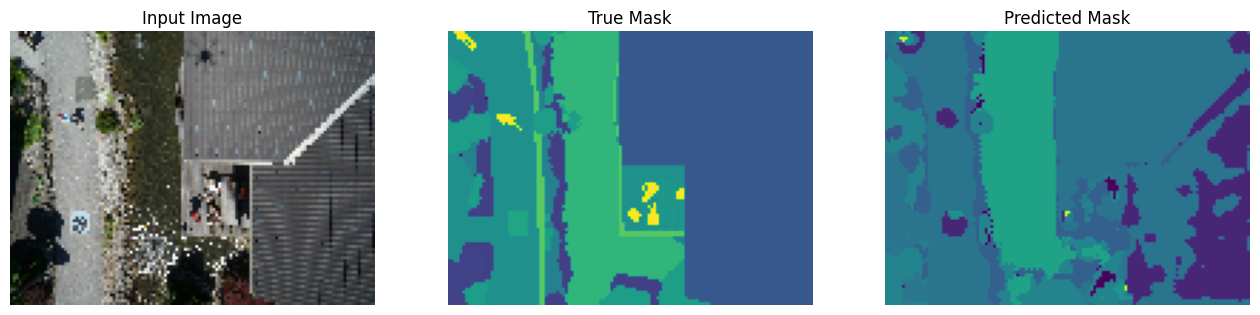

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


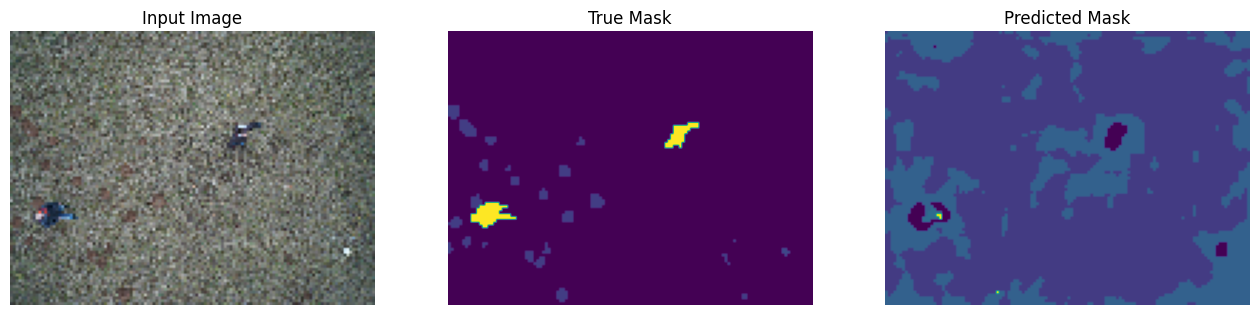

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


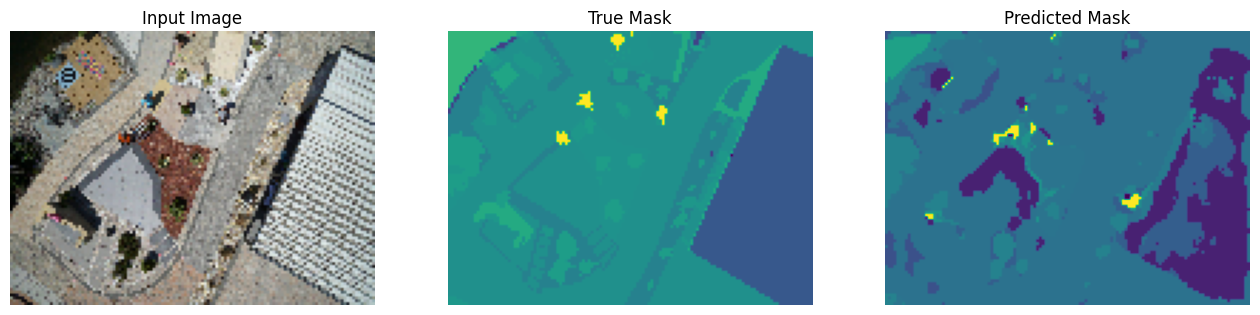

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


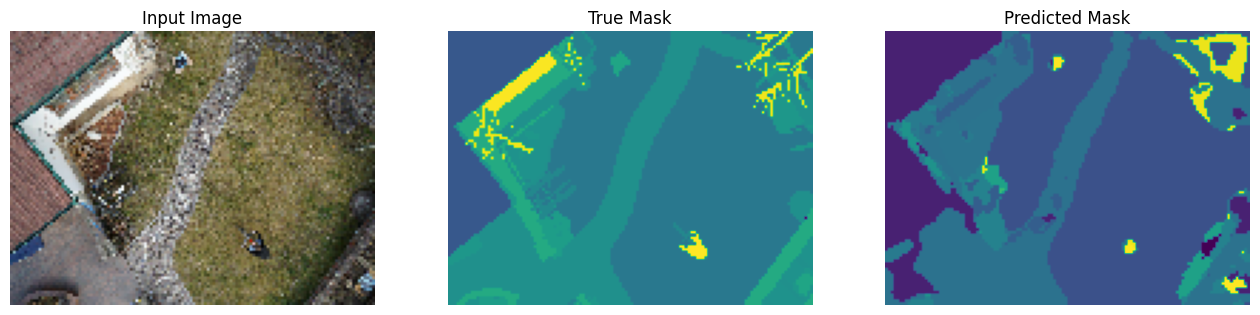

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


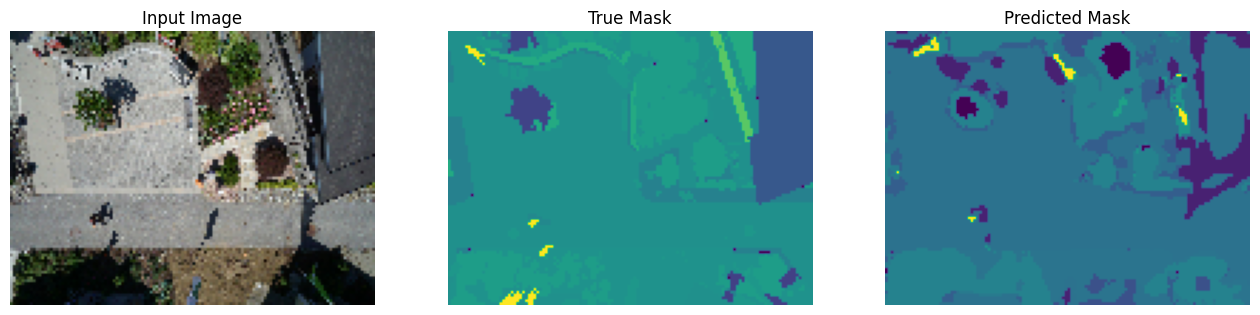

In [34]:
show_predictions(train_dataset, 5)